### Questão 1

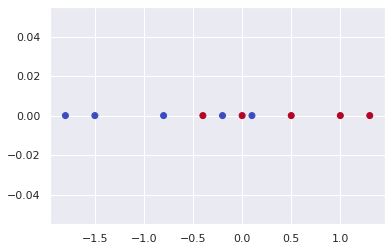

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

x = np.array([-1.8,-1.5,-0.8,-0.4,-0.2, 0.0, 0.1, 0.5, 1.0, 1.3])
y = np.array([ 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0,  1.0, 1.0, 1.0])
yh = np.array([ -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0])

plt.scatter(x,np.zeros(10), c=y,cmap=plt.cm.coolwarm)

In [2]:
from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression(solver='lbfgs')
regressor.fit(x.reshape(-1,1), y)

y_hat = regressor.predict_proba(x.reshape(-1, 1))
y_hat = y_hat[:,1]

#showing y_hat
print(y_hat)

[0.13261925 0.17751253 0.32541791 0.43305978 0.49010741 0.54741386
 0.57569568 0.68238051 0.79236488 0.84342601]


In [3]:
#calculando entropia cruzada binária

binary_cross_entropy = -y*np.log(y_hat) -(1-y)*np.log(1-y_hat)
print(f'Media: {np.mean(binary_cross_entropy):.3f}')
binary_cross_entropy

Media: 0.449


array([0.14227724, 0.19542204, 0.3936619 , 0.83687949, 0.67355518,
       0.60255017, 0.85730435, 0.38216784, 0.23273329, 0.1702831 ])

In [4]:
#calculando quadratic loss

quadratic_loss = (y-y_hat)**2
print(f'Media: {np.mean(quadratic_loss):.3f}')
quadratic_loss

Media: 0.142


array([0.01758786, 0.0315107 , 0.10589682, 0.32142121, 0.24020527,
       0.20483422, 0.33142552, 0.10088214, 0.04311234, 0.02451541])

In [5]:
#calculando perda 0-1

y_class = y_hat.copy()
y_class[y_class >= 0.5] = 1
y_class[y_class < 0.5] = 0
print(y_class)

loss_zero_one = (y != y_class).astype(int)

print(f'Média: {np.mean(loss_zero_one):.3f}')
loss_zero_one

[0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
Média: 0.200


array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [6]:
#calculando perda SVM/Hinge

y_hat_hinge = 2*(y_hat - 0.5)
print(y_hat_hinge)

loss_hinge = 1- yh*y_hat_hinge
loss_hinge = np.where(loss_hinge > 0, loss_hinge, 0)
print(f'Média: {np.mean(loss_hinge):.3f}')
print(loss_hinge)

[-0.73476151 -0.64497493 -0.34916418 -0.13388043 -0.01978519  0.09482772
  0.15139137  0.36476102  0.58472976  0.68685202]
Média: 0.681
[0.26523849 0.35502507 0.65083582 1.13388043 0.98021481 0.90517228
 1.15139137 0.63523898 0.41527024 0.31314798]


### Questão 3

In [7]:
y = np.array([0, 0, 0, 0, 1])
y_hat = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

quadratic_loss = np.sum((y-y_hat)**2)
print(quadratic_loss)

categorical_loss = -np.sum((y*np.log(y_hat)))
print(categorical_loss)

0.8000000000000002
1.6094379124341003


Questão 7

In [8]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [9]:
#carregando os datasets
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.boston_housing.load_data()
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(404, 13) (404,) (102, 13) (102,)


In [10]:
#aplicando z-score
x_train_mean = np.mean(x_train, axis=0)
x_train_std = np.std(x_train, axis=0)

x_train = x_train - x_train_mean
x_train = x_train/x_train_std

x_val = x_val - x_train_mean
x_val = x_val/x_train_std

In [11]:
#criando a rede 1
#tf.keras.backend.clear_session()

np.random.seed(1)
tf.random.set_seed(2)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(x_train.shape[1], )))
model.add(tf.keras.layers.Dense(8, activation='relu', ))
model.add(tf.keras.layers.Dense(1, activation='relu', ))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                224       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
log = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
13/13 [==============================] - 0s 13ms/step - loss: 585.1754 - mae: 22.3727 - val_loss: 613.9129 - val_mae: 23.0327
Epoch 2/50
13/13 [==============================] - 0s 4ms/step - loss: 583.2806 - mae: 22.3219 - val_loss: 611.5378 - val_mae: 22.9651
Epoch 3/50
13/13 [==============================] - 0s 4ms/step - loss: 580.0660 - mae: 22.2220 - val_loss: 607.6867 - val_mae: 22.8512
Epoch 4/50
13/13 [==============================] - 0s 4ms/step - loss: 575.4921 - mae: 22.0783 - val_loss: 602.3406 - val_mae: 22.6769
Epoch 5/50
13/13 [==============================] - 0s 3ms/step - loss: 569.1945 - mae: 21.8791 - val_loss: 595.4497 - val_mae: 22.4521
Epoch 6/50
13/13 [==============================] - 0s 3ms/step - loss: 560.9045 - mae: 21.6187 - val_loss: 586.7144 - val_mae: 22.2004
Epoch 7/50
13/13 [==============================] - 0s 3ms/step - loss: 550.8667 - mae: 21.3266 - val_loss: 576.0061 - val_mae: 21.8998
Epoch 8/50
13/13 [=============================

In [13]:
np.random.seed(1)
tf.random.set_seed(2)

model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(x_train.shape[1], )))
model2.add(tf.keras.layers.Dense(8, activation='relu', ))
model2.add(tf.keras.layers.Dense(1, activation='relu', ))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                224       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [14]:
def scheduler(epoch, lr):
  print("Taxa atual = %.5f" % (lr))
  if epoch < 10:
    return lr
  else:
    return np.round(lr * np.exp(-0.05),4)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)
model2.compile(optimizer=tf.keras.optimizers.Adam(0.02), loss='mse', metrics=['mae'])
log = model2.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val), callbacks=[lr_scheduler])

Taxa atual = 0.02000
Epoch 1/50
13/13 [==============================] - 0s 10ms/step - loss: 546.3029 - mae: 21.0637 - val_loss: 502.7113 - val_mae: 19.6967
Taxa atual = 0.02000
Epoch 2/50
13/13 [==============================] - 0s 3ms/step - loss: 364.7370 - mae: 16.3605 - val_loss: 209.1079 - val_mae: 12.1301
Taxa atual = 0.02000
Epoch 3/50
13/13 [==============================] - 0s 3ms/step - loss: 88.3725 - mae: 7.2638 - val_loss: 78.3668 - val_mae: 6.6225
Taxa atual = 0.02000
Epoch 4/50
13/13 [==============================] - 0s 3ms/step - loss: 41.4210 - mae: 4.5843 - val_loss: 40.2850 - val_mae: 5.1418
Taxa atual = 0.02000
Epoch 5/50
13/13 [==============================] - 0s 3ms/step - loss: 28.1764 - mae: 4.0251 - val_loss: 28.4456 - val_mae: 4.1727
Taxa atual = 0.02000
Epoch 6/50
13/13 [==============================] - 0s 3ms/step - loss: 21.8346 - mae: 3.3420 - val_loss: 24.9516 - val_mae: 3.9363
Taxa atual = 0.02000
Epoch 7/50
13/13 [==============================] - 

Exercício 8

In [15]:
def network_genetator():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Input(shape=x_train.shape[1], ))
  model.add(tf.keras.layers.Dense(16, activation='relu'))
  model.add(tf.keras.layers.Dense(8, activation='relu'))
  model.add(tf.keras.layers.Dense(1, activation='relu'))
  return model

def scheduler(epoch, lr):
  if epoch < 6:
    return lr
  else:
    return np.round(lr * np.exp(-0.1), 4)

Batch Size: 2 | MSE: 22.4658
Batch Size: 4 | MSE: 19.1443
Batch Size: 8 | MSE: 23.9285
Batch Size: 16 | MSE: 21.6256
Batch Size: 32 | MSE: 25.3148
Batch Size: 64 | MSE: 23.7474
Batch Size: 128 | MSE: 30.6912
Batch Size: 256 | MSE: 129.7587


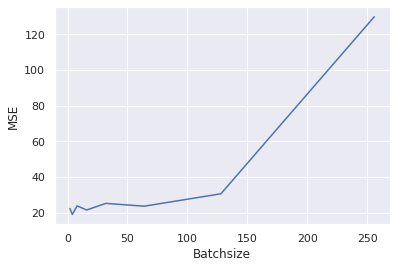

In [16]:
batches = [2, 4, 8, 16, 32, 64, 128, 256]
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)
results = {}

for batch in batches:

  np.random.seed(1)
  tf.random.set_seed(2)

  model = network_genetator()
  n_epochs = int(np.log2((batch*512)))
  model.compile(optimizer=tf.keras.optimizers.Adam(0.02), loss='mse', metrics=['mae'])
  log = model.fit(x_train, y_train, epochs=n_epochs, batch_size=batch, callbacks=lr_scheduler, verbose=0)

  score = model.evaluate(x_val, y_val, verbose=0)
  results[batch] = score[0]
  print(f'Batch Size: {batch} | MSE: {score[0]:.4f}')

plt.plot(list(results.keys()), list(results.values()))
plt.xlabel('Batchsize')
plt.ylabel('MSE')
plt.show()

Questão 10

In [17]:
#carregando a base
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

#colocando no intervalo [0-1]
x_train = x_train/ 255.0
x_test = x_test/ 255.0

#aplicando o one-hot-encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

#adcionando uma dimensão extra 
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(60000, 28, 28, 1) (60000, 10) (10000, 28, 28, 1) (10000, 10)


In [18]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import add
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Dense

#definindo o modulo inception
def inception_module(layer_in, f1_out, f2_in, f2_out, f3_in, f3_out, f4_out):
    # 1x1 conv
    conv1 = Conv2D(f1_out, (1,1), padding='same', activation='relu')(layer_in)
    # 3x3 conv
    conv3 = Conv2D(f2_in, (1,1), padding='same', activation='relu')(layer_in)
    conv3 = Conv2D(f2_out, (3,3), padding='same', activation='relu')(conv3)
    # 5x5 conv
    conv5 = Conv2D(f3_in, (1,1), padding='same', activation='relu')(layer_in)
    conv5 = Conv2D(f3_out, (5,5), padding='same', activation='relu')(conv5)
    # 3x3 max pooling
    pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)
    pool = Conv2D(f4_out, (1,1), padding='same', activation='relu')(pool)
    layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)

    return layer_out

#definindo o modulo residual
def residual_block(layer_in, n_filters):
    merge_input = layer_in
    #verifica se é necessária uma primeira camada para deixar o número de filtros iguais para adição
    if layer_in.shape[-1] != n_filters:
        merge_input = Conv2D(n_filters, (1,1), padding='same', activation='relu', kernel_initializer='he_normal')(layer_in) #sqrt(2 / fan_in) numero de input units
    # conv1
    conv1 = Conv2D(n_filters, (3,3), padding='same', activation='relu', kernel_initializer='he_normal')(layer_in)
    # conv2
    conv2 = Conv2D(n_filters, (3,3), padding='same', activation='linear', kernel_initializer='he_normal')(conv1)
    # soma entrada com saída (pulou 2 camadas)
    layer_out = add([conv2, merge_input])
    # função de ativação da saída do bloco
    layer_out = tf.keras.layers.Activation('relu')(layer_out)
    return layer_out

In [19]:
#criando a rede inception

input_layer = Input(shape=(28, 28, 1))
layer1 = inception_module(input_layer, 32, 32, 32, 32, 32, 16)
pool1 = MaxPooling2D((2,2), strides=(2,2), padding='same')(layer1)
layer2 = inception_module(pool1, 32, 64, 64, 64, 64, 16)
pool2 = MaxPooling2D((2,2), strides=(2,2), padding='same')(layer2)
flatt = GlobalAveragePooling2D()(pool2)
softmax = Dense(10, activation='softmax')(flatt)

Inception = tf.keras.models.Model(input_layer, outputs=softmax)
Inception.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 32)   64          input_9[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 28, 28, 32)   64          input_9[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 28, 28, 1)    0           input_9[0][0]                    
_______________________________________________________________________________________

In [20]:
#criar a rede residual

input_layer = Input(shape=(28, 28, 1))
layer1 = residual_block(input_layer, 64)
pool1 = MaxPooling2D((2,2), strides=(2,2), padding='same')(layer1)
layer2 = residual_block(pool1, 64)
pool2 = MaxPooling2D((2,2), strides=(2,2), padding='same')(layer2)
layer3 = residual_block(pool2, 64)
pool3 = MaxPooling2D((2,2), strides=(2,2), padding='same')(layer3)
flatt = GlobalAveragePooling2D()(pool3)
softmax = Dense(10, activation='softmax')(flatt)

ResNet = tf.keras.models.Model(input_layer, outputs=softmax)
ResNet.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 28, 28, 64)   640         input_10[0][0]                   
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 28, 28, 64)   36928       conv2d_13[0][0]                  
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 28, 28, 64)   128         input_10[0][0]                   
_______________________________________________________________________________________

In [21]:
x_train_sub = x_train[:800]
y_train_sub = y_train[:800]

print(x_train_sub.shape)
print(y_train_sub.shape)

(800, 28, 28, 1)
(800, 10)


In [22]:
np.random.seed(1)
tf.random.set_seed(2)

Inception.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(lr=0.05, momentum=0.8),
              metrics=['accuracy'])

histInc = Inception.fit(x_train_sub, y_train_sub,
                    batch_size=64,
                    epochs=100, verbose=0)

In [23]:
#tf.keras.backend.clear_session()
np.random.seed(1)
tf.random.set_seed(2)

ResNet.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(lr=0.05, momentum=0.8),
              metrics=['accuracy'])

histResNet = ResNet.fit(x_train_sub, y_train_sub,
                    batch_size=64,
                    epochs=100, verbose=0)

In [24]:
score_incep_train = Inception.evaluate(x_train_sub, y_train_sub, verbose = 0)
score_resn_train = ResNet.evaluate(x_train_sub, y_train_sub, verbose = 0)

score_incep = Inception.evaluate(x_test, y_test, verbose = 0)
score_resn = ResNet.evaluate(x_test, y_test, verbose = 0)

In [25]:
print("Inception Treinamento = Loss %.3f, Accuracy %.3f" % (score_incep_train[0], score_incep_train[1]))
print("Inception Teste       = Loss %.3f, Accuracy %.3f" % (score_incep[0], score_incep[1]))

print("ResNet Treinamento    = Loss %.3f, Accuracy %.3f" % (score_resn_train[0], score_resn_train[1]))
print("ResNet Teste          = Loss %.3f, Accuracy %.3f" % (score_resn[0], score_resn[1]))

Inception Treinamento = Loss 0.403, Accuracy 0.831
Inception Teste       = Loss 0.778, Accuracy 0.740
ResNet Treinamento    = Loss 0.000, Accuracy 1.000
ResNet Teste          = Loss 1.428, Accuracy 0.812


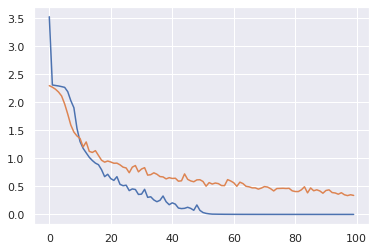

In [26]:
plt.plot(histResNet.history['loss'])
plt.plot(histInc.history['loss'])
plt.show()